<h1> Lecture 12: Fit of Binned Distributions </h1>

<h3> Exercise 12.2 </h3>
<p> Generate a file dati_2.txt containing 10,000 events distributed according to a Gaussian probability distribution.</p>
<ul>  

<li> Write a program that fits the events saved in the file dati_2.txt using the binned and unbinned maximum likelihood methods, and compare the results of the two techniques. </li>


</ul>

In [10]:
from myrand import generate_TCL_ms

NSample = 10000

sigma = 1
mu = 0

SampleGauss = generate_TCL_ms(mu,sigma,NSample,100,10)

with open(r'dati_2.txt','w') as output:
    for line in SampleGauss:
        output.write(f"{line}\n")
    print('Done')



Done


<h3> Binned Maximum Likelihood Method </h3>

<p> this method utilize the extended maximum likelihood as a model, so we define a function that return the numer of element of the sample for every bar of the histogram and we give this fnction to extend likelihood function and we estimate
the value of mu and sigma of the data, starting from input parameter mu,sigma <p>



In [11]:
import numpy as np
from iminuit import Minuit
from math import floor, ceil
from iminuit.cost import ExtendedBinnedNLL
from matplotlib import pyplot as plt
from scipy.stats import expon, norm


bin_content, bin_edges = np.histogram (SampleGauss, bins = floor (NSample/100), 
                                       range = (floor (min (SampleGauss)), ceil (max (SampleGauss))))



def mod_signal_bin (bin_edges, N_signal, mu, sigma):
    return N_signal * norm.cdf (bin_edges, mu, sigma)

my_cost_func_bin = ExtendedBinnedNLL (bin_content, bin_edges, mod_signal_bin)

my_minuit_bin = Minuit (
                        my_cost_func_bin, 
                        N_signal = sum (bin_content), 
                        mu = np.mean (SampleGauss), 
                        sigma = np.std (SampleGauss),
                       )
my_minuit_bin.limits['N_signal', 'sigma'] = (0, None)
my_minuit_bin.migrad ()
assert my_minuit_bin.valid
display (my_minuit_bin)

# get the estimate of the N_background and tau parameter for the final fit
mean_bin = [my_minuit_bin.values[1], my_minuit_bin.errors[1]]
sigma_bin = [my_minuit_bin.values[2], my_minuit_bin.errors[2]]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 109 (χ²/ndof = 1.1)        │              Nfcn = 34               │
│ EDM = 2.88e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal │  10.0e3   │   0.1e3   │            │            │    0    │         │       │
│ 1 │ mu       │   -0.01   │   0.01    │            │            │         │         │       │
│ 2 │ sigma    │   0.995   │   0.007   │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬────────────────────────────┐
│          │ N_signal       mu    sigma │
├──────────┼────────────────────────────┤
│ N_signal │    1e+04 -0.01e-3  0.50e-3 │
│       mu │ -0.01e-3 9.91e-05       -0 │
│    sigma │  0.50e-3       -0 4.99e-05 │
└──────────┴────────────────────────────┘

<h3> Unbinned Maximum Likelihood </h3>

<p> It start from a Hypothesis that data follow a normal distribution, and in this case is true because they were generated from a CLT algorithm, and estimate mu true and sigma true</p>

In [12]:
from iminuit.cost import UnbinnedNLL

def mod_signal_unb (x, mu, sigma) : 
    return norm.pdf(x, mu, sigma)

my_cost_func_unb = UnbinnedNLL (SampleGauss, mod_signal_unb)

my_minuit_unb = Minuit (
                        my_cost_func_unb, 
                        mu = np.mean (SampleGauss), 
                        sigma = np.std (SampleGauss)
                       )
my_minuit_unb.limits["sigma"] = (0, None)
my_minuit_unb.migrad ()
assert my_minuit_unb.valid
display (my_minuit_unb)

mean_unb = [my_minuit_unb.values[0], my_minuit_unb.errors[0]]
sigma_unb = [my_minuit_unb.values[1], my_minuit_unb.errors[1]]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.826e+04                  │              Nfcn = 22               │
│ EDM = 3.23e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   -0.01   │   0.01    │            │            │         │         │       │
│ 1 │ sigma │   0.994   │   0.007   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 9.88e-05        0 │
│ sigma │        0 4.94e-05 │
└───────┴───────────────────┘

<h3> Comparison Between the two method </h3>

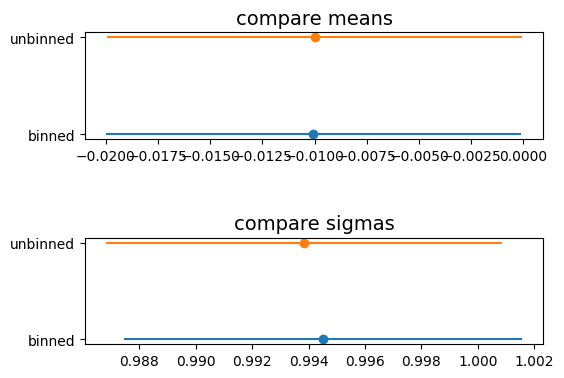

In [13]:
fig, axes = plt.subplots (2, 1)

# setting the two sub-figures apart
fig.tight_layout (pad=5.0)

# plot means
axes[0].set_title ('compare means', size=14)
axes[0].errorbar (mean_bin[0], 'binned', xerr = mean_bin[1], marker = 'o')
axes[0].errorbar (mean_unb[0], 'unbinned', xerr = mean_unb[1], marker = 'o')

#plot sigmas
axes[1].set_title ('compare sigmas', size=14)
axes[1].errorbar (sigma_bin[0], 'binned', xerr = sigma_bin[1], marker = 'o')
axes[1].errorbar (sigma_unb[0], 'unbinned', xerr = sigma_unb[1], marker = 'o')

plt.show ()